<div style="background-color: maroon; overflow: auto; height: 60px;">
  <div style="text-align: right;color: white;">BY :- ASHU KUMAR</div>
  <div style="text-align: center; color: white; font-weight: bold; font-size: 28px;">SPACEX FALCON-9 SUCESS LANDING PREDICTION</div>
</div>

**SpaceX promotes its Falcon 9 rocket launches on its website, offering them at a cost of 62 million dollars. In comparison, other providers charge upwards of 165 million dollars for each launch. A significant factor contributing to SpaceX's cost savings is its ability to reuse the first stage of the Falcon 9 rocket. Consequently, determining the success of first stage landings becomes crucial in estimating the launch cost. The Falcon 9 launch process is similar to that of regular rockets, consisting of three stages: Stage 1, Stage 2, and Stage 3. Stage 2 and Stage 3 assist in propelling the payload into orbit, while Stage 1 primarily focuses on lifting the payload into space. The first stage is substantial and expensive.**

**Unlike many other rocket providers, SpaceX has developed the capability to recover and reuse the first stage of their Falcon 9 rockets. However, successful landings of the first stage do not always occur. In some cases, it may crash during the landing attempt, while in other cases, SpaceX may choose to sacrifice the first stage due to specific mission requirements such as payload, orbit, or customer preferences.**

**In this project, the aim is to gather information about SpaceX and create informative dashboards that can predict the price of each launch. Rather than solely relying on traditional rocket science principles to determine the success of first stage landings, a machine learning model will be trained using publicly available data. This model will then assist in making predictions about the likelihood of SpaceX reusing the first stage, based on the trained model and the relevant public information. The approach involves a combination of data analysis, visual representations, and machine learning techniques to estimate launch costs and evaluate the feasibility of first stage reuse in SpaceX's operations.**

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>OBJECTIVE</b></font>
  </span>
</center>

# <u>*Objective of SPACEX Falcon-9 Sucess Landing Prediction are :-<u>* #
+ Develop a reliable predictive model
+ Improve mission planning
+ Provide insights for decision-making
+ Enhance safety measures
+ Optimize rocket reusability: 

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>TABLE OF CONTENT</b></font>
  </span>
</center>

## <u>Table of Content are:-<u>
-  Importing libraries

-  Loading data from SPACEX API
- Data pre-processing

- Feature engineering

- Data visualization

- Correlation matrix

- Model Building

- Model Evaluation

- Conclusion

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>IMPORTING LIBRARIES</b></font>
  </span>
</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import requests
import datetime
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>LOADING DATA FROM SPACEX API</b></font>
  </span>
</center>

<u>**Let's start requesting rocket launch data from SpaceX API with the following URL:**<u>

In [2]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [3]:
response = requests.get(spacex_url)

<u>**Check the content of the response<u>**

In [4]:
print(response.content[:200])

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/0'


<u>**See that the request was successfull with the 200 status response code or not**<u>

In [5]:
response.status_code

200

Requests was successfull with 200 status response code

<u>**Now we decode the response content as a Json using <code>.json()</code> and turn it into a Pandas dataframe using <code>.json_normalize()</code>**<u>

In [6]:
data = pd.json_normalize(response.json())

<u>**Using the dataframe <code>data</code> print the first 5 rows**<u>

In [7]:
df= data.head()
df

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

Upon closer inspection, I have observed that a significant portion of the data consists of identification numbers instead of descriptive information. For instance, in the 'rocket' column, there are only identification numbers without any accompanying details about the rockets themselves.

To address this limitation, I will utilize the API once again to gather additional information about the launches. This time, I will focus on retrieving details related to the 'rocket', 'payloads', 'launchpad', and 'cores' columns.

By leveraging these columns, I aim to acquire comprehensive insights into the rockets, payloads, launchpads, and cores associated with each launch. This endeavor will enable a more comprehensive analysis and understanding of the data, thereby enhancing the quality of subsequent evaluations and conclusions.

<u>**Lets take a subset of our dataframe keeping only the features we want**<u>

In [8]:
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]
data.columns

Index(['rocket', 'payloads', 'launchpad', 'cores', 'flight_number',
       'date_utc'],
      dtype='object')

<u>**Lets remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.**<u>

In [9]:
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

<u>**Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.**<u>

In [10]:
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

<u>**Lets convert the date_utc to a datetime datatype and then extracting the date leaving the time**<u>

In [11]:
data['date'] = pd.to_datetime(data['date_utc']).dt.date

<u>**Using the date we will restrict the dates of the launches**<u>

In [12]:
data = data[data['date'] <= datetime.date(2023,6, 27)]

In [13]:
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


## <u>**Now, again use API to get information about the columns that have IDs or Dictionary** <u> ##

To extract additional information from the identified columns and enrich the analysis, the following features or attributes will be obtained:

From the 'rocket' column:
- Booster Name: Retrieve the name of the booster associated with each launch.

From the 'payload' column:
- Payload Mass: Gather information about the mass of the payload.
- Orbit: Extract details regarding the specific orbit that the payload is intended for.

From the 'launchpad' column:
- Launch Site Name: Obtain the name of the launch site being utilized.
- Longitude: Retrieve the longitude coordinates of the launch site.
- Latitude: Gather the latitude coordinates of the launch site.

From the 'cores' column:
- Landing Outcome: Determine the outcome of the landing for each core.
- Landing Type: Obtain information regarding the type of landing performed.
- Number of Flights: Gather the count of flights associated with a particular core.
- Gridfins Usage: Identify whether gridfins were used during the landing.
- Core Reusability: Determine if the core has been reused.
- Legs Usage: Obtain information regarding the usage of legs during landing.
- Landing Pad: Retrieve the specific landing pad used.
- Core Block: Gather the block number associated with the core, which signifies different core versions.
- Core Reuse Count: Determine the number of times a specific core has been reused.
- Core Serial: Retrieve the serial number associated with the core.

By extracting these features from the respective columns, we can gain a more comprehensive understanding of the launch data and facilitate deeper analysis and insights.

<U>**Now, Define a series of helper functions that will help us use the API to extract information using identification numbers in the launch data.**<u>

**From the <code>rocket</code> column we would like to learn the booster name.**

In [14]:
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

**From the <code>launchpad</code> i would like to know the name of the launch site being used, the logitude, and the latitude.**

In [15]:
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

**From the <code>payload</code> i would like to learn the mass of the payload and the orbit that it is going to.**

In [16]:
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

**From <code>cores</code> i would like to learn the outcome of the landing, the type of the landing, number of flights with that core, whether gridfins were used, wheter the core is reused, wheter legs were used, the landing pad used, the block of the core which is a number used to seperate version of cores, the number of times this specific core has been reused, and the serial of the core.**

In [17]:
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

<u> **The data from requests will be stored in lists and will be used to create a new dataframe.** <u>

In [18]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

<u> **Now, let's apply <code> getBoosterVersion</code> function method to get the booster version** <u>

In [19]:
getBoosterVersion(data)

<u> **we can apply the rest of the  functions here:** <u>

In [20]:
getLaunchSite(data)

In [21]:
getPayloadData(data)

In [22]:
getCoreData(data)

<u> **Finally lets construct our dataset using the data we have obtained. We we combine the columns into a dictionary.** <u>

In [23]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

<u> **Now, i need to create a Pandas data frame from the dictionary launch_dict** <u>

In [24]:
df_dict = pd.DataFrame(launch_dict)

<u>**Finally i will remove the Falcon 1 launches keeping only the Falcon 9 launches. Filter the data dataframe using the <code>BoosterVersion</code> column to only keep the Falcon 9 launches. Save the filtered data to a new dataframe called <code>df</code>.**<u>

In [25]:
df = df_dict[df_dict['BoosterVersion'] != 'Falcon 1']
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


<u>**Now that we have removed some values we should reset the FlgihtNumber column**<u>

In [26]:
df.loc[:,'FlightNumber'] = list(range(1,df.shape[0]+1))
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>DATA PRE-PROCESSING</b></font>
  </span>
</center>

**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [27]:
df.shape

(168, 17)

**Conduct an examination of the columns present in the dataset.**

In [28]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 4 to 171
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    168 non-null    int64  
 1   Date            168 non-null    object 
 2   BoosterVersion  168 non-null    object 
 3   PayloadMass     146 non-null    float64
 4   Orbit           167 non-null    object 
 5   LaunchSite      168 non-null    object 
 6   Outcome         168 non-null    object 
 7   Flights         168 non-null    int64  
 8   GridFins        168 non-null    bool   
 9   Reused          168 non-null    bool   
 10  Legs            168 non-null    bool   
 11  LandingPad      142 non-null    object 
 12  Block           168 non-null    float64
 13  ReusedCount     168 non-null    int64  
 14  Serial          168 non-null    object 
 15  Longitude       168 non-null    float64
 16  Latitude        168 non-null    float64
dtypes: bool(3), float64(4), int64(3), o

From the above output, we can conclude and note that:

  -  There are missing values in PayloadMass,Orbit and LandingPad
  -  Date column is not parsed as DateTime

**Perform a statistical summary of the dataset consisting of numerical values.**

In [30]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,168.000000,146.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,84.500000,8191.079110,3.732143,4.196429,5.500000,-86.780776,29.514774
std,48.641546,5521.332964,3.241707,1.385377,4.681471,14.519168,2.196342
min,1.000000,330.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,42.750000,3025.000000,1.000000,4.000000,1.000000,-80.603956,28.561857
50%,84.500000,6780.500000,2.000000,5.000000,5.000000,-80.577366,28.561857
75%,126.250000,13260.000000,5.250000,5.000000,9.000000,-80.577366,28.608058
max,168.000000,15600.000000,13.000000,5.000000,13.000000,-80.577366,34.632093


**Perform a statistical summary of the dataset consisting of categorical variables.**

In [31]:
df.describe(include=['object','bool'])

,Date,BoosterVersion,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
count,168,168,167,168,168,168,168,168,142,168
unique,168,1,12,3,8,2,2,2,6,62
top,2010-06-04,Falcon 9,VLEO,CCSFS SLC 40,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
freq,1,168,54,93,109,148,108,149,57,13


Among the columns with object data types, one of them is Date. Although it is currently classified as an object data type, it should ideally be a datetime data type. We will proceed to change the data type of Date column accordingly.     

**Conduct an examination of the distinct values present in each column of the dataset.**

In [32]:
df.nunique()

FlightNumber      168
Date              168
BoosterVersion      1
PayloadMass        81
Orbit              12
LaunchSite          3
Outcome             8
Flights            13
GridFins            2
Reused              2
Legs                2
LandingPad          6
Block               5
ReusedCount        11
Serial             62
Longitude           3
Latitude            3
dtype: int64

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [33]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass       22
Orbit              1
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Upon closer inspection, it is evident that the three column named PayloadMass,Orbit and LandingPad containing blank cells or missing values.

**Fill the blanks cells with the mean and mode of their respective columns.**

In [34]:
df['PayloadMass'].fillna(df['PayloadMass'].mean(), inplace=True)
df['Orbit'].fillna(df['Orbit'].mode()[0], inplace=True)
df['LandingPad'].replace('None', np.nan, inplace=True)

**Let's perform another check to verify if all the null values have been successfully filled or not.**

In [35]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

We have confirmed that there are no empty cells present in the dataset except LandingPad.

**Perform a check for duplicate data entries within the dataset to identify and assess any occurrences of duplicated records.**

In [36]:
df.duplicated().sum()

0

Upon careful examination, it has been determined that there are no duplicated values present in the dataset.

<u>**Perform a count of unique values for each column in the dataset.**<u>

In [37]:
value_counts = {}
for column in df.columns:
    value_counts[column] = df[column].value_counts()

for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print()

Value counts for column 'FlightNumber':
1      1
116    1
108    1
109    1
110    1
      ..
58     1
59     1
60     1
61     1
168    1
Name: FlightNumber, Length: 168, dtype: int64

Value counts for column 'Date':
2010-06-04    1
2021-08-29    1
2021-04-29    1
2021-05-04    1
2021-05-09    1
             ..
2018-11-15    1
2018-12-03    1
2018-12-05    1
2018-12-23    1
2022-10-05    1
Name: Date, Length: 168, dtype: int64

Value counts for column 'BoosterVersion':
Falcon 9    168
Name: BoosterVersion, dtype: int64

Value counts for column 'PayloadMass':
13260.00000    30
15600.00000    27
8191.07911     22
9600.00000      7
3500.00000      3
               ..
5600.00000      1
2490.00000      1
5500.00000      1
4600.00000      1
678.00000       1
Name: PayloadMass, Length: 82, dtype: int64

Value counts for column 'Orbit':
VLEO     55
ISS      32
GTO      31
LEO      14
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: Orbit, d

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>FEATURE ENGINEERING</b></font>
  </span>
</center>

## <u> **Create a landing outcome label from Outcome column** <u> ##

In [38]:
landing_outcomes=df['Outcome'].value_counts()
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 True RTLS
2 None None
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.

<u> **We create a set of outcomes where the second stage did not land successfully:** <u>

In [39]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'True RTLS'}

<u> **Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:** <u>

In [40]:
landing_class = df['Outcome'].map(lambda x: 0 if x in bad_outcomes else 1)

<u>**This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the  first stage did not land successfully; one means  the first stage landed Successfully**<u>

In [41]:
df['Class']=landing_class[:500]
df[['Class']].head(8)

,Class
4,1
5,1
6,1
7,0
8,1
9,1
10,1
11,1


In [42]:
df['Class'].dtypes

dtype('int64')

In [43]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,1
5,2,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,1
6,3,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,1
7,4,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,1


<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>DATA VISUALIZATION</b></font>
  </span>
</center>

<u>**Perform data visualization to present Distribution of Payload Mass**<u>

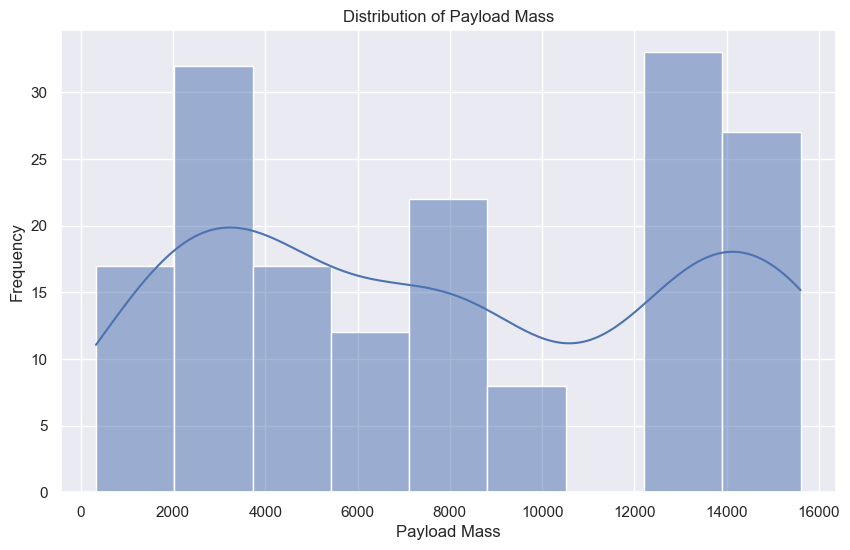

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df['PayloadMass'],kde=True)
plt.title(f"Distribution of Payload Mass")
plt.xlabel("Payload Mass")
plt.ylabel("Frequency")
plt.show()

The PayloadMass column exhibits a predominant distribution within the ranges of 2000 to 4000 and 12000 to 14000.

<u>**Perform data visualization to present Distribution of Orbit and LaunchSite**<u>

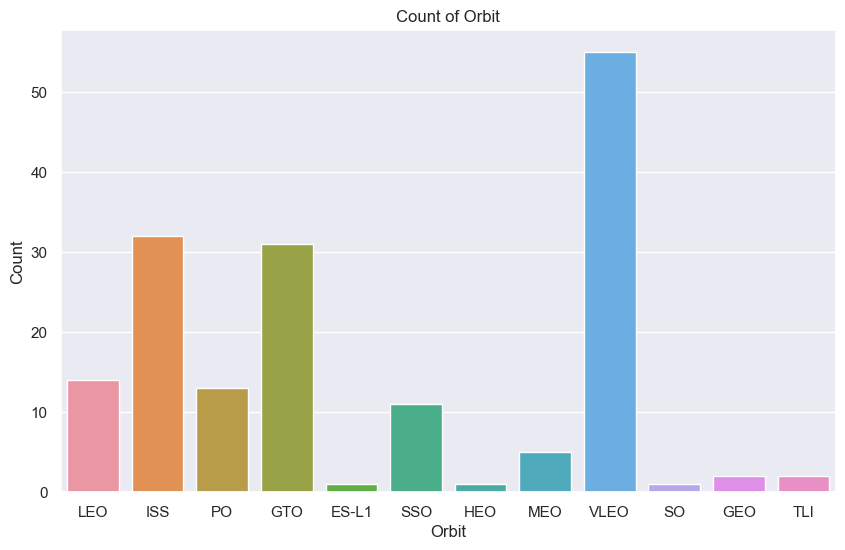

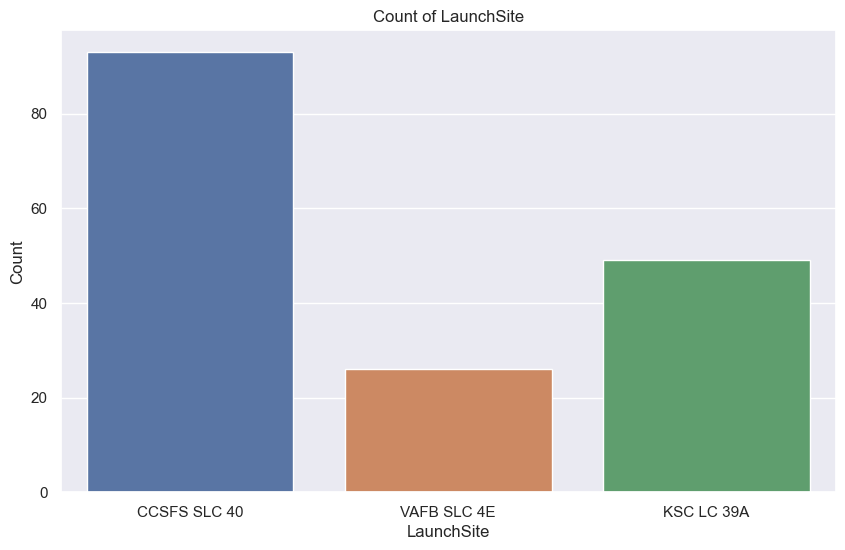

In [45]:
cate_vari = ['Orbit','LaunchSite']
for var in cate_vari:
    plt.figure(figsize=(10,6))
    sns.countplot(x=var,data=df)
    plt.title(f"Count of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

From the above output, we can conclude and note that: 

   -  The most prevalent types of launches are VLEO (Very Low Earth Orbit), followed by ISS (International Space Station) and          GTO (Geostationary Transfer Orbit).
   -  The most frequent launch sites are CCSFS SLC 40 (Cape Canaveral Space Force Station Space Launch Complex 40), followed by        KSC LC 39A (Kennedy Space Center Launch Complex 39A) and VAFB SLC 4E (Vandenberg Air Force Base Space Launch Complex 4E).

<u>**Perform data visualization to present Distribution of Class in Payload Mass.**<u>

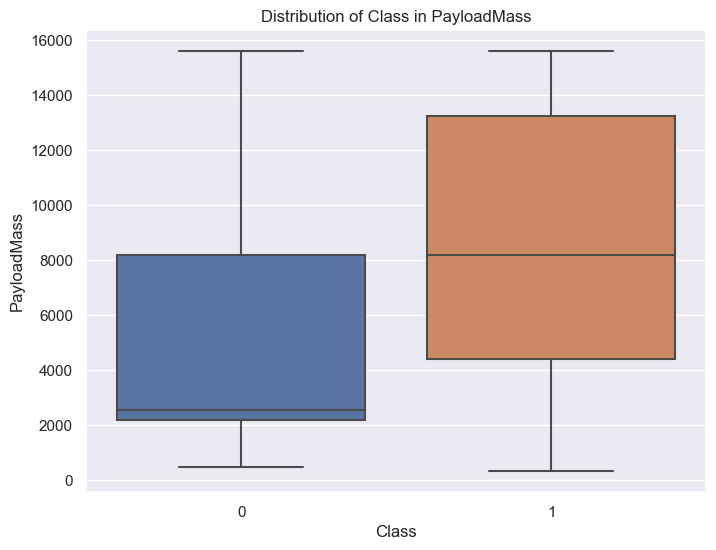

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class',y='PayloadMass',data=df)
plt.xlabel('Class')
plt.ylabel('PayloadMass')
plt.title('Distribution of Class in PayloadMass')
plt.show()

Based on the presented plot, it can be observed that the majority of failed landings occur with low payload masses. Conversely, successful launches are predominantly associated with high payload masses.

<u>**Perform data visualization to present Distribution of Class in Payload Mass in stacked barchart.**<u>

<Figure size 800x600 with 0 Axes>

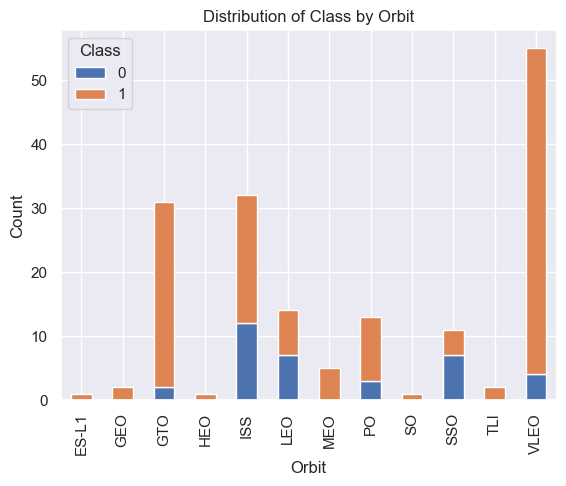

In [47]:
plt.figure(figsize=(8, 6))
df.groupby('Orbit')['Class'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.title('Distribution of Class by Orbit')
plt.legend(title='Class', loc='upper left')
plt.show()

The analysis reveals that the most successful stage 1 is landed when the mission is targeted towards Very Low Earth Orbit (VELO). In contrast, the International Space Station (ISS) missions have experienced the highest number of failed stage 1 landings.

<u>**Perform data visualization to present Distribution of Class by LaunchSite**<u>

<Figure size 800x600 with 0 Axes>

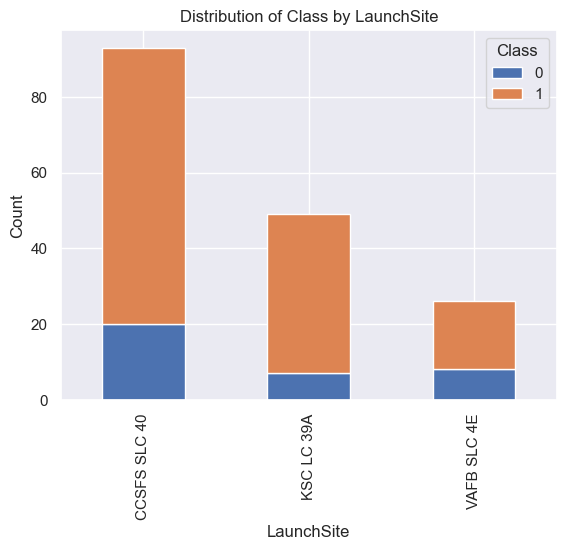

In [48]:
plt.figure(figsize=(8, 6))
df.groupby('LaunchSite')['Class'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('LaunchSite')
plt.ylabel('Count')
plt.title('Distribution of Class by LaunchSite')
plt.legend(title='Class', loc='upper right')
plt.show()

The launch site that has demonstrated the highest number of successful stage 1 landings is CCSFS SLC 40 (Cape Canaveral Space Force Station Space Launch Complex 40).

# <u>**Success Rate by Year**<u> #

<u>**The function will help you get the year from the date:**<u>

In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

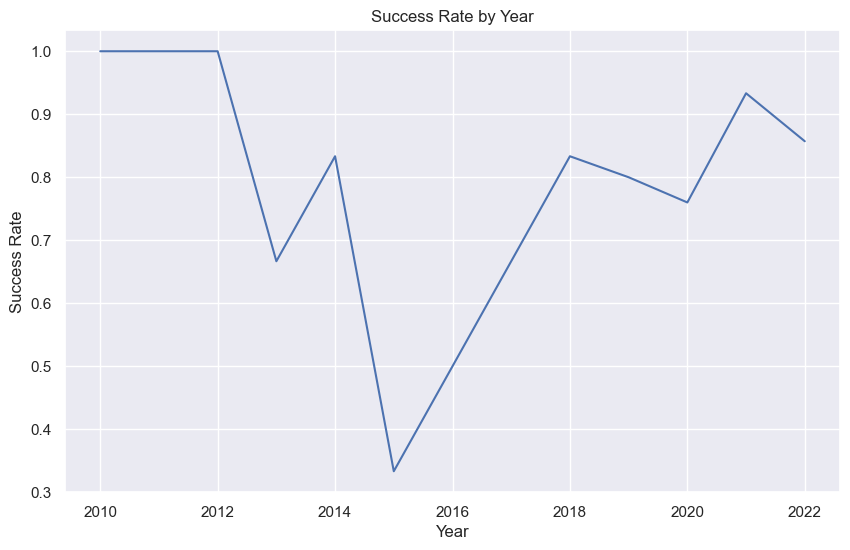

In [50]:
success_rate = df.groupby('Year')['Class'].mean()
plt.figure(figsize=(10, 6))
plt.plot(success_rate.index, success_rate.values)
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.title('Success Rate by Year')
plt.show()

In [51]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
4,1,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,1,2010
5,2,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,1,2012
6,3,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,1,2013
7,4,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0,2013
8,5,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,1,2013


# <u>**Now, let's create a visualization of the rocket launch sites on a map using the 'folium' library.**<u> #

First, we need to define the latitude and longitude coordinates for the region of the United States since the launch sites are located in America. We will then use these coordinates to visualize the launch sites on a map using the 'folium' library. We will set the zoom level of the map to 4 to provide an appropriate level of detail.

In [52]:
latitude = 37.090
longitude = -95.712

In [53]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=4)

Finally, we can visualize the map with the defined latitude and longitude coordinates, along with the launch sites marked on it.

In [54]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df.Latitude, df.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df.Latitude)
longitudes = list(df.Longitude)
labels = list(df.LaunchSite)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

From the generated map, we can observe that there are only three launch sites present in the dataset. One is located on the west coast of America in California, while the other two are situated on the east coast of America in Florida.

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>CORRELATION MATRIX</b></font>
  </span>
</center>

<u>**Next, we will analyze the correlation between the features in the dataset, focusing only on the numerical attributes while excluding the categorical variables at this stage.**<u>

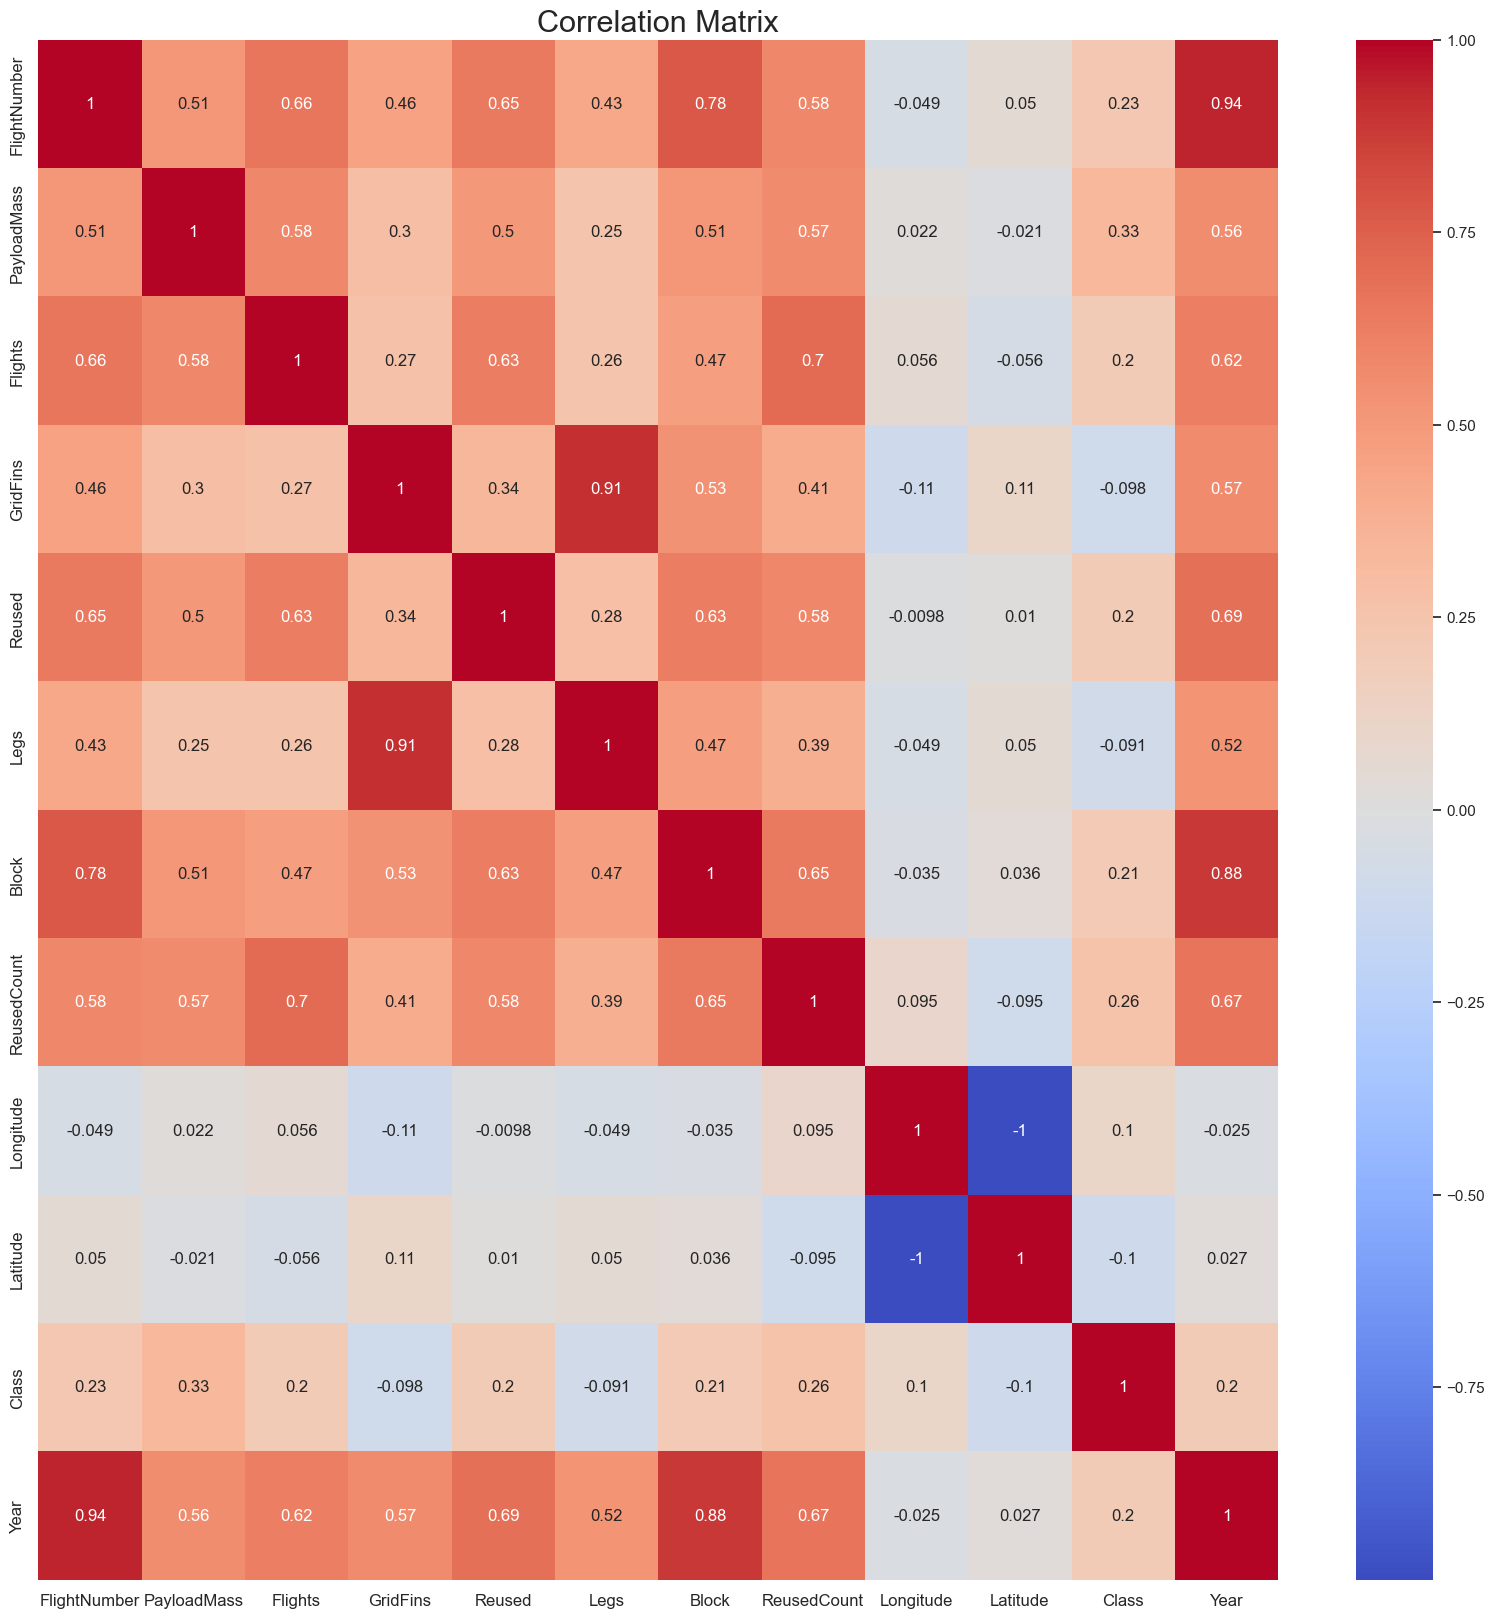

In [55]:
corr_matr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matr,annot=True,cmap='coolwarm',annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the analysis above, we can observe the correlation between different columns in the dataset. This correlation analysis provides insights into the strength and direction of relationships between the variables, helping us understand how changes in one variable relate to changes in another.

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>MODEL BUILDING</b></font>
  </span>
</center>

<u>**Obtain a list of categorical variables.**<u>

In [56]:
df['Class'] = df['Class'].astype(int)

In [57]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'LandingPad', 'Serial']


In [58]:
df.replace({'False': 0, 'True': 1}, inplace=True)
df.drop('Date', axis=1, inplace=True)

<u>**Perform label encoding on the variables with object data type.**<u>

In [59]:
label_data = df.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
4,1,0,8191.07911,5,0,4,1,False,False,False,6,1.0,0,0,-80.577366,28.561857,1,2010
5,2,0,525.00000,5,0,4,1,False,False,False,6,1.0,0,1,-80.577366,28.561857,1,2012
6,3,0,677.00000,4,0,4,1,False,False,False,6,1.0,0,2,-80.577366,28.561857,1,2013
7,4,0,500.00000,7,2,1,1,False,False,False,6,1.0,0,3,-120.610829,34.632093,0,2013
8,5,0,3170.00000,2,0,4,1,False,False,False,6,1.0,0,4,-80.577366,28.561857,1,2013


In [60]:
label_data.shape

(168, 18)

In [61]:
label_data.head()

,FlightNumber,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
4,1,0,8191.07911,5,0,4,1,False,False,False,6,1.0,0,0,-80.577366,28.561857,1,2010
5,2,0,525.00000,5,0,4,1,False,False,False,6,1.0,0,1,-80.577366,28.561857,1,2012
6,3,0,677.00000,4,0,4,1,False,False,False,6,1.0,0,2,-80.577366,28.561857,1,2013
7,4,0,500.00000,7,2,1,1,False,False,False,6,1.0,0,3,-120.610829,34.632093,0,2013
8,5,0,3170.00000,2,0,4,1,False,False,False,6,1.0,0,4,-80.577366,28.561857,1,2013


In [62]:
label_data['Class'].dtype

dtype('int32')

<u>**Assigning the features as X and trarget as y and then split the dataset for further modelling**<u>

In [63]:
X = label_data.drop(["Class"], axis=1)
y = label_data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<u>**Create a list of diverse machine learning algorithms, which will serve as the classifiers for our analysis.**<u>

In [64]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier())
]

<u>**Create a dictionary that contains various evaluation metrics as keys and their corresponding values as the evaluation formulas.**<u>

In [65]:
metrics = {
    'R2 Score': [],
    'Mean Absolute Error': [],
    'Mean Squared Error': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

<u>**Create a pipeline by combining the StandardScaler and the chosen classifier, train it on the training data, predict the rocket launches for the test data, calculate the evaluation metrics, store them in the dictionary, and display the evaluation metrics for the current classifier.**<u>

In [66]:
for name, classifier in classifiers:
    # Create a pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

    # Train the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict the rocket launches for the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionary
    metrics['R2 Score'].append(r2)
    metrics['Mean Absolute Error'].append(mae)
    metrics['Mean Squared Error'].append(mse)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

    # Display the evaluation metrics for the current classifier
    print(f"Metrics for {name}:")
    print("R2 Score:", r2)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()


Metrics for Logistic Regression:
R2 Score: 0.8488888888888889
Mean Absolute Error: 0.029411764705882353
Mean Squared Error: 0.029411764705882353
Accuracy: 0.9705882352941176
Precision: 0.9615384615384616
Recall: 1.0
F1 Score: 0.9803921568627451

Metrics for Decision Tree:
R2 Score: 0.6977777777777778
Mean Absolute Error: 0.058823529411764705
Mean Squared Error: 0.058823529411764705
Accuracy: 0.9411764705882353
Precision: 0.9259259259259259
Recall: 1.0
F1 Score: 0.9615384615384615

Metrics for K-Nearest Neighbors:
R2 Score: 0.24444444444444458
Mean Absolute Error: 0.14705882352941177
Mean Squared Error: 0.14705882352941177
Accuracy: 0.8529411764705882
Precision: 0.8333333333333334
Recall: 1.0
F1 Score: 0.9090909090909091

Metrics for Support Vector Machine:
R2 Score: 0.6977777777777778
Mean Absolute Error: 0.058823529411764705
Mean Squared Error: 0.058823529411764705
Accuracy: 0.9411764705882353
Precision: 0.9259259259259259
Recall: 1.0
F1 Score: 0.9615384615384615

Metrics for Random F

The above results show the R2 Score, Mean Absolute Error, Mean Squared Error, Accuracy, Precision, Recall, and F1 Score for the different algorithms mentioned in the code.

In [67]:
metrics_df = pd.DataFrame(metrics, index=[name for name, _ in classifiers])

# Find the best algorithm based on the highest accuracy
best_algorithm = metrics_df['Accuracy'].idxmax()

# Print the evaluation metrics for each algorithm
print(metrics_df)

# Print the best algorithm
print('Best Algorithm:', best_algorithm)

                              R2 Score  Mean Absolute Error  \
Logistic Regression           0.848889             0.029412   
Decision Tree                 0.697778             0.058824   
K-Nearest Neighbors           0.244444             0.147059   
Support Vector Machine        0.697778             0.058824   
Random Forest                 0.546667             0.088235   
Gaussian Naive Bayes          0.546667             0.088235   
Gradient Boosting Classifier  0.697778             0.058824   

                              Mean Squared Error  Accuracy  Precision  Recall  \
Logistic Regression                     0.029412  0.970588   0.961538    1.00   
Decision Tree                           0.058824  0.941176   0.925926    1.00   
K-Nearest Neighbors                     0.147059  0.852941   0.833333    1.00   
Support Vector Machine                  0.058824  0.941176   0.925926    1.00   
Random Forest                           0.088235  0.911765   0.892857    1.00   
Gaussian 

Based on the above results, it is evident that logistic regression outperforms the other algorithms for this particular dataset. The evaluation metrics for logistic regression are as follows:

   - R2 Score: 0.8488888888888889
   - Mean Absolute Error: 0.029411764705882353
   - Mean Squared Error: 0.029411764705882353
   - Accuracy: 0.9705882352941176
   - Precision: 0.9615384615384616
   - Recall: 1.0
   - F1 Score: 0.9803921568627451

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>MODEL EVALUATION</b></font>
  </span>
</center>

<u>**Now, let's create two lists: "accuracy_before" and "accuracy_after" to calculate the accuracy before cross-validation and the accuracy after cross-validation, respectively.**<u>

In [68]:
accuracy_before = []
accuracy_after = []

In [69]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_before.append(accuracy)
print('Accuracy Before CV:', accuracy)

Accuracy Before CV: 0.9411764705882353


The accuracy before cross-validation is 0.9411764705882353.

<u>**Let's calculate the accuracy after cross-validation, cross-validation scores, and the average cross-validation score.**<u>

In [70]:
scores = cross_val_score(pipeline, X, y, cv=5)
accuracy_cv = np.mean(scores)
accuracy_after.append(accuracy_cv)
print('Accuracy After CV:', accuracy_cv)
print('Cross-Validation Scores:', scores)
print('Average Cross-Validation Score:', np.mean(scores))

Accuracy After CV: 1.0
Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0


The accuracy after cross-validation is 1.0. The cross-validation scores are [1.0, 1.0, 1.0, 1.0, 1.0], and the average cross-validation score is 1.0.

<u>**Now let's create a confusion plot to visualize the test and prediction results.**<u>

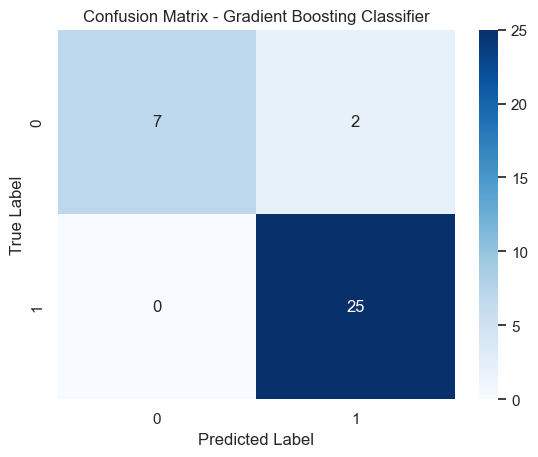

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title('Confusion Matrix - ' + name)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>CONCLUSION</b></font>
  </span>
</center>

## <u>**In this project, the following steps were followed:**<u> ##

   - Importing the necessary libraries.
   - Loading the data from an API and converting it into a dataframe.
   - Handling identification numbers in certain columns by using another API to obtain proper values.
   - Performing data preprocessing, such as replacing null values and examining value counts.
   - Conducting feature engineering to enhance the dataset.
   - Visualizing the data through various charts and graphs.
   - Analyzing the correlation matrix to understand the relationships between variables.
   - Building machine learning models.
   - Evaluating the models using cross-validation and generating a confusion matrix.

Overall, the project involved importing data, preprocessing, feature engineering, visualization, model building, and evaluation to gain insights and make predictions based on the dataset.